In [4]:
#import all the necessary modules
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

In [5]:
def create_labels_csv_file(dataset_path: str) -> None:
    class_names = [] # get a list of sub_directories in dataset as class names
    for folder_name in os.listdir(dataset_path):
        class_names.append(folder_name)

    image_paths = []
    labels = []

    # loop through each class i.e train and valid and gather image paths and labels
    for i in range(len(class_names)):
        class_name = class_names[i]

        if '.csv' in os.path.basename(class_name):# skip if it's a CSV file 
            continue
        image_names = os.listdir(
            os.path.join(
                dataset_path,
                class_name
            )
        )

        # collect image paths and corresponding labels
        for image_name in image_names:
            image_path = os.path.join(
                dataset_path,
                class_name,
                image_name
            )
            image_paths.append(image_path)
            labels.append(i)

    # create a DataFrame from the collected data
    df = pd.DataFrame(
        {
            'name': image_paths,
            'label': labels
        }
    )

    # save the DataFrame in a CSV file
    df.to_csv(
        path_or_buf=os.path.join(
            dataset_path,
            'labels.csv'
        ),
        index=False
    )

In [6]:
# create CSV file for train dataset
create_labels_csv_file(
    dataset_path=os.path.join(
        'data',
        'train'
    )
)

# create CSV file for valid dataset
create_labels_csv_file(
    dataset_path=os.path.join(
        'data',
        'valid'
    )
)

In [7]:
# Define data loaders
dls = ImageDataLoaders.from_folder(
    path='data',         # Path to the main dataset folder
    train='train',       # Path to the train folder
    valid='valid',       # Path to the valid folder
    item_tfms=Resize(224),  # Resize images to 224x224 pixels
    bs=16,                  # Batch size
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()]  # Batch transformations(augmentation)
)

c:\Users\Chaitali\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\Chaitali\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


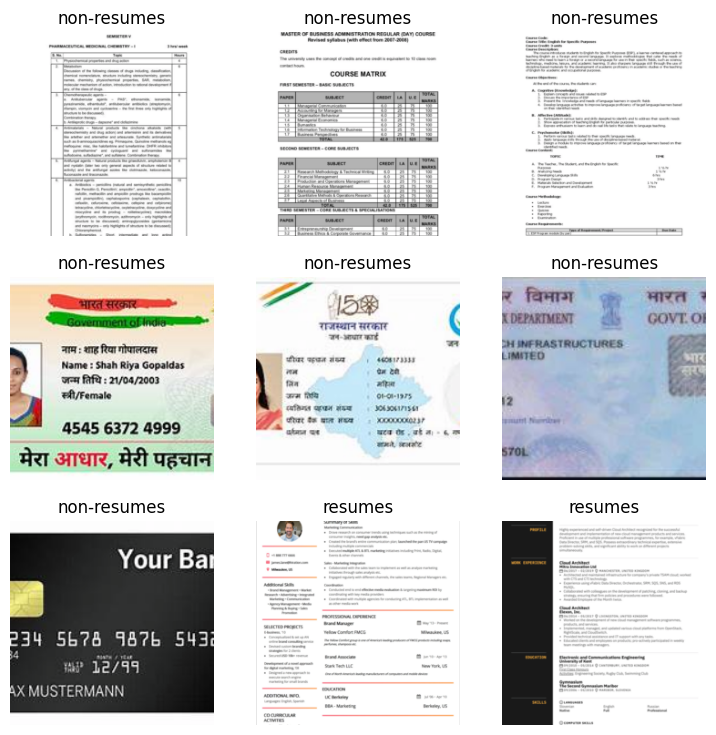

In [8]:
dls.valid.show_batch()# how a batch of images from the valid set

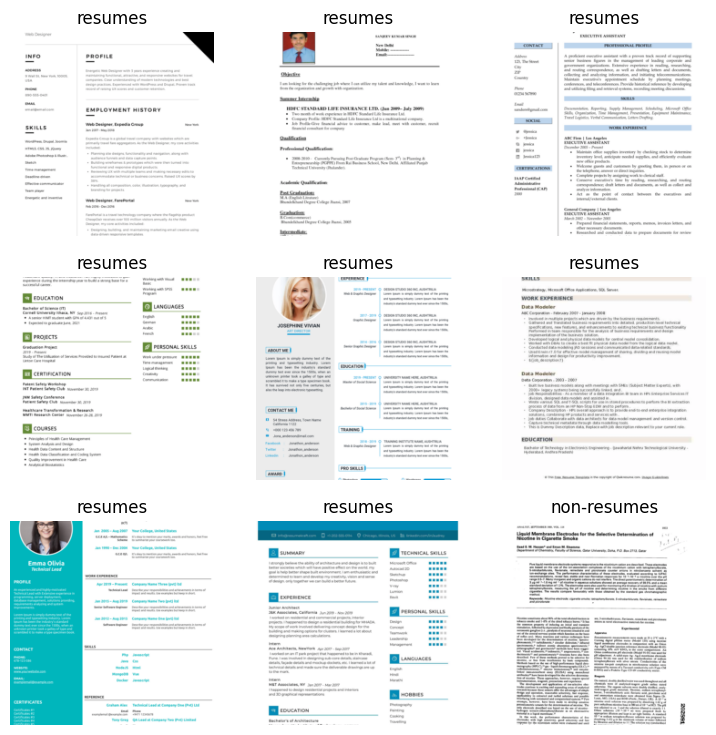

In [9]:
dls.train.show_batch()# show a batch of images from the train set

In [10]:
# create a vision learner with ResNet-50 architecture
model = vision_learner(
    dls=dls,
    arch=models.resnet50,  # ResNet-50 architecture
    metrics=[accuracy, error_rate]  # metrics to track during training
)

In [11]:
#fine tune the pre trained model using custom i.e. our dataset
model.fine_tune(
    epochs=15
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.751526,1.443142,0.411765,0.588235,00:24
1,0.461533,0.580669,0.705882,0.294118,00:23
2,0.354579,0.198870,0.882353,0.117647,00:24
3,0.311771,0.126129,0.941176,0.058824,00:24
4,0.361217,0.102905,0.941176,0.058824,00:24
5,0.365927,0.138458,0.882353,0.117647,00:23
6,0.348006,0.015267,1.000000,0.000000,00:24
7,0.317669,0.045425,1.000000,0.000000,00:24
8,0.284919,0.075489,0.941176,0.058824,00:23
9,0.260048,0.038794,1.000000,0.000000,00:23


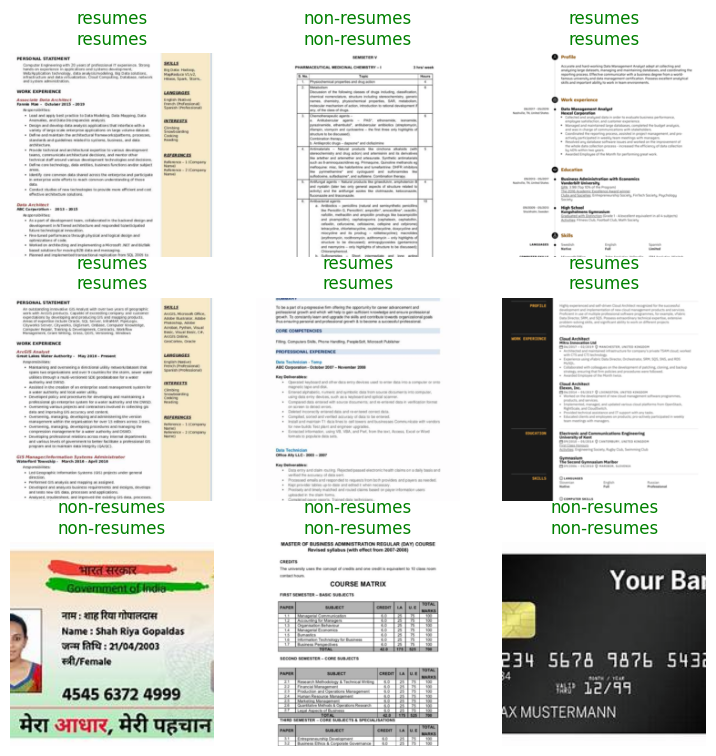

In [12]:
model.show_results()# show a table with columns for the actual labels, predicted labels, and images

In [13]:
model.validate()#gives valid_loss, accuracy and error_rate

(#3) [0.03915994614362717,1.0,0.0]

In [14]:
model.export('resume_classifier.pkl') #save the learner model

In [21]:
new_model = load_learner('data/resume_classifier.pkl')# load the export model

In [23]:
new_model.predict(#predict using test image
    item='C:/Users/Chaitali/OneDrive/Desktop/chaitali-bureau-assignment/data/train/resumes/a1.png'#replace with path to your testing image
)

('resumes', tensor(1), tensor([6.9090e-06, 9.9999e-01]))

c:\Users\Chaitali\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\Chaitali\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


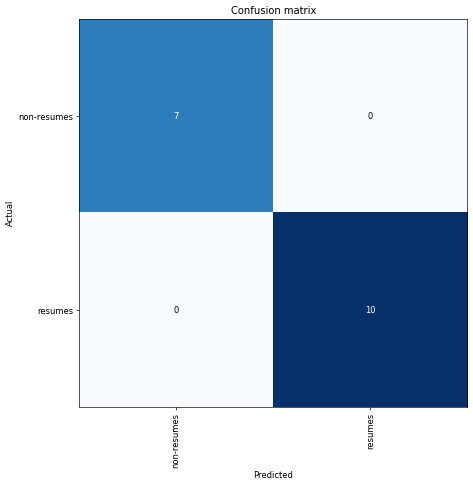

In [26]:
# create an interpretation object
interp = ClassificationInterpretation.from_learner(model)

# plot the confusion matrix
interp.plot_confusion_matrix(figsize=(8, 8), dpi=60)

In [30]:
interp.print_classification_report()

              precision    recall  f1-score   support

 non-resumes       1.00      1.00      1.00         7
     resumes       1.00      1.00      1.00        10

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

